In [2]:
# Alternative version that gives special treatment for the number of rows N
import graphviz as gr
import pandas as pd

def get_function_args(func):
    return func.__code__.co_varnames[:func.__code__.co_argcount]

def simulate(N: int, **kwargs):
  values = {}
  g = gr.Digraph()
  for variable_name, function in kwargs.items():
    parents = get_function_args(function)
    inputs = {arg: values[arg] for arg in parents if arg in values}
    if 'N' in parents:
        inputs['N'] = N
    values[variable_name] = function(**inputs)
    for p in parents:
        g.edge(p, variable_name)
  data = pd.DataFrame(values)
  return data, g

In [3]:
# Example usage:
import numpy as np
from numpy.random import normal, uniform, choice

def get_income(age, height, gender, N):
    return normal(100*age + 10*height, 1000 + np.where(gender=='male', 1000, 0), N)

df, g = simulate(
    N = 100, 
    age=lambda N: uniform(0,100,N), 
    gender=lambda N: choice(['male', 'female'], N),
    height=lambda age, N: normal(4.5, 1, N) + np.where(age > 15, 1, 0), 
    income = get_income,
)
df

,age,gender,height,income
0,94.435177,female,4.150877,9895.746940
1,16.609468,female,5.938260,2814.553351
2,14.290370,male,3.881104,2028.648127
3,51.168844,female,5.251031,6047.712663
4,55.510332,male,4.631817,8426.973285
...,...,...,...,...
95,3.937700,male,3.600775,1095.404478
96,72.581293,female,6.059898,7319.707812
97,25.784436,female,4.334338,3064.940172
98,16.836854,male,2.254714,2576.863011


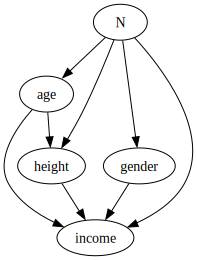

In [4]:
g

In [5]:
def simulate(**kwargs):
  values = {}
  g = gr.Digraph()
  for k,v in kwargs.items():
    parents = v.__code__.co_varnames
    inputs = {arg: values[arg] for arg in parents}
    values[k] = v(**inputs)
    for p in parents:
        g.edge(p,k)
  data = pd.DataFrame(values)
  return data, g

,age,income,signup,spend
0,41.221487,50870.470682,0,3232
1,76.944287,47009.926495,1,4014
2,63.383624,50917.607765,1,4335
3,55.116826,30124.310854,1,3731
4,27.673156,47803.281122,0,3185


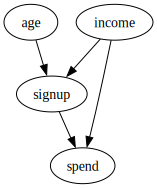

In [6]:
from numpy.random import binomial, poisson

np.random.seed(42)

N = 100
df, g = simulate(
    age = lambda: uniform(18, 80, N),
    income = lambda: normal(50000, 10000, N),
    signup = lambda age, income: binomial(1, 1/(1+np.exp(-(age-40)/10)) + 1/(income)),
    spend = lambda signup, income: poisson(1000 + 1000 * signup + 10*np.sqrt(income), N),
)
display(df.head())
g

,age,degree,income
0,51.398949,High School,156492.730079
1,78.365301,MBA,190838.571826
2,39.654278,MBA,149313.498312
3,62.208670,MD,163029.218734
4,86.236371,PhD,191362.420635
...,...,...,...
95,15.285914,MBA,107559.242496
96,24.595773,MBA,123703.561083
97,16.068137,MBA,116367.973671
98,18.656702,BA,111612.001371


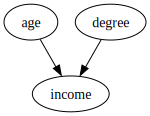

In [7]:
# categorical example

N = 100
df, g = simulate(
    age = lambda: uniform(0, 100, N),
    degree = lambda: choice(['High School', 'BA', 'MBA', 'PhD', 'MD'], N),
    income = lambda age, degree: normal(100000 + 1000 * age + (degree == 'PhD') * 10000, 10000),
)
display(df)
g